In [1]:
import pandas as pd 
import numpy as np



In [2]:
recipe =pd.read_csv('recipes.csv')
# recipe.head()

In [3]:
recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 
 12  RecipeIngredientQuantities  522514 non-null  object 
 13  RecipeIngredie

In [4]:
recipe.shape
recipe.isnull().sum()
recipe.dropna(inplace=True)

In [5]:
recipe.shape

(28014, 28)

In [6]:
#want to know the value of sugar,carbs,fat,protein
recipe['SugarContent'].value_counts()
# recipe['FiberContent'].value_counts()


SugarContent
0.1      554
0.0      447
0.2      376
0.3      312
0.8      309
        ... 
139.7      1
82.3       1
486.4      1
85.0       1
144.4      1
Name: count, Length: 1157, dtype: int64

In [7]:
# extract image of first row
# recipe.iloc[0]['Images']
recipe['RecipeCategory'].value_counts()

RecipeCategory
Dessert            4568
Lunch/Snacks       1944
Breakfast          1805
Quick Breads       1753
Breads             1355
                   ... 
Iraqi                 1
High Fiber            1
Austrian              1
Mixer                 1
Pressure Cooker       1
Name: count, Length: 227, dtype: int64

In [8]:
health = pd.read_csv('health_fitness_dataset.csv')

In [9]:
health.head()


,participant_id,date,age,gender,height_cm,weight_kg,bmi,activity_type,duration_minutes,intensity,...,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,endurance_level,sleep_hours,stress_level,hydration_level,smoking_status,health_condition,fitness_level
0,1,2024/1/1,56,F,165.3,50.55,18.50,Dancing,42.1,Low,...,69.5,110.7,72.9,5.37,6.6,4,1.5,Never,NaN,0.04
1,1,2024/1/4,56,F,165.3,55.38,20.27,Swimming,66.9,Low,...,69.5,110.7,72.9,5.39,8.1,3,1.8,Never,NaN,0.07
2,1,2024/1/5,56,F,165.3,56.49,20.68,Swimming,20.0,Medium,...,69.5,110.7,72.9,5.42,6.2,5,2.7,Never,NaN,0.09
3,1,2024/1/7,56,F,165.3,52.23,19.12,Weight Training,23.5,Medium,...,69.5,110.7,72.9,5.44,7.2,4,2.6,Never,NaN,0.21
4,1,2024/1/9,56,F,165.3,53.96,19.75,Swimming,75.0,Medium,...,69.5,110.7,72.9,5.47,7.1,7,1.5,Never,NaN,0.33


In [10]:
# checking the values of fitness level in the dataset 
health['health_condition'].value_counts()

health_condition
Hypertension    99437
Diabetes        64754
Asthma          33235
Name: count, dtype: int64

In [11]:
# cleaning the data
# health.isnull().sum()

In [12]:
health.shape

(687701, 23)

In [13]:
health.dropna(inplace=True)
# health.isnull().sum()

In [14]:
health.head()

,participant_id,date,age,gender,height_cm,weight_kg,bmi,activity_type,duration_minutes,intensity,...,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,endurance_level,sleep_hours,stress_level,hydration_level,smoking_status,health_condition,fitness_level
1164,6,2024/1/1,61,M,178.6,79.43,24.90,Swimming,37.6,Medium,...,68.7,123.0,78.0,5.03,7.5,5,3.3,Never,Diabetes,0.09
1165,6,2024/1/3,61,M,178.6,77.30,24.23,Cycling,46.8,Low,...,68.7,123.0,78.0,5.05,5.2,8,2.2,Never,Diabetes,0.17
1166,6,2024/1/7,61,M,178.6,73.86,23.15,Cycling,45.4,High,...,68.7,123.0,78.0,5.08,7.1,5,2.1,Never,Diabetes,0.31
1167,6,2024/1/10,61,M,178.6,79.43,24.90,Dancing,24.9,Low,...,68.7,123.0,78.0,5.10,6.1,8,1.6,Never,Diabetes,0.33
1168,6,2024/1/12,61,M,178.6,79.43,24.90,Cycling,41.9,Medium,...,68.7,123.0,78.0,5.13,5.4,7,2.6,Never,Diabetes,0.43


In [15]:
# select important columns from the dataset
health = health[['health_condition', 'fitness_level', 'activity_type','age','gender','height_cm','weight_kg','bmi','calories_burned','duration_minutes','resting_heart_rate']]
health.head()


,health_condition,fitness_level,activity_type,age,gender,height_cm,weight_kg,bmi,calories_burned,duration_minutes,resting_heart_rate
1164,Diabetes,0.09,Swimming,61,M,178.6,79.43,24.90,8.3,37.6,68.7
1165,Diabetes,0.17,Cycling,61,M,178.6,77.30,24.23,9.7,46.8,68.7
1166,Diabetes,0.31,Cycling,61,M,178.6,73.86,23.15,16.7,45.4,68.7
1167,Diabetes,0.33,Dancing,61,M,178.6,79.43,24.90,1.8,24.9,68.7
1168,Diabetes,0.43,Cycling,61,M,178.6,79.43,24.90,11.6,41.9,68.7


In [16]:
health.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197426 entries, 1164 to 687242
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   health_condition    197426 non-null  object 
 1   fitness_level       197426 non-null  float64
 2   activity_type       197426 non-null  object 
 3   age                 197426 non-null  int64  
 4   gender              197426 non-null  object 
 5   height_cm           197426 non-null  float64
 6   weight_kg           197426 non-null  float64
 7   bmi                 197426 non-null  float64
 8   calories_burned     197426 non-null  float64
 9   duration_minutes    197426 non-null  float64
 10  resting_heart_rate  197426 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 18.1+ MB


In [17]:
# selecting the important columns from the recipe dataset
recipe = recipe[['Name', 'Description', 'Images', 'RecipeInstructions', 'Keywords', 'RecipeCategory', 'Calories', 'FatContent', 'CarbohydrateContent', 'ProteinContent', 'FiberContent', 'SodiumContent', 'SugarContent', 'CholesterolContent']]

In [18]:
recipe.shape

(28014, 14)

In [19]:
#add the recipe type to the dataset
recipe['Type'] = np.random.choice(['Vegetarian', 'Non-Vegetarian'], size=len(recipe), p=[0.5, 0.5])


In [20]:
def classify_veg(ingredients):
  non_veg_keywords = ['chicken', 'mutton', 'beef', 'pork', 'fish', 'egg', 'bacon', 'shrimp']
  for item in ingredients.split():
    if any(kw in item.lower() for kw in non_veg_keywords):
      return 'Non-Vegetarian'
  return 'Vegetarian'

# Apply the function to classify recipes
recipe['Type'] = recipe['RecipeInstructions'].apply(classify_veg)

# Check the counts of vegetarian and non-vegetarian recipes
print(recipe['Type'].value_counts())

Type
Non-Vegetarian    14943
Vegetarian        13071
Name: count, dtype: int64


In [21]:
# # writing the dataset values in to lowercase
recipe['RecipeCategory'] = recipe['RecipeCategory'].str.lower()
recipe['Keywords'] = recipe['Keywords'].str.lower()
recipe['Name'] = recipe['Name'].str.lower()
recipe['Description'] = recipe['Description'].str.lower()
recipe['RecipeInstructions'] = recipe['RecipeInstructions'].str.lower()
recipe['Type']=recipe['Type'].str.lower()





In [22]:
# another way to preprocess the data is remove punctuation from the dataset 

import string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))
# remove punctuation from the recipe dataset
recipe['RecipeCategory'] = recipe['RecipeCategory'].apply(remove_punctuation)
recipe['Keywords'] = recipe['Keywords'].apply(remove_punctuation)
recipe['RecipeInstructions']=recipe['RecipeInstructions'].apply(remove_punctuation)
recipe['Description']=recipe['Description'].apply(remove_punctuation)
recipe['Name']=recipe['Name'].apply(remove_punctuation)



In [23]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [24]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# remove stop words from the recipe dataset
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.lower() not in stop_words]
    return ' '.join(tokens)
# remove stop words from the recipe dataset
recipe['RecipeCategory'] = recipe['RecipeCategory'].apply(preprocess_text)
recipe['Keywords'] = recipe['Keywords'].apply(preprocess_text)
recipe['RecipeInstructions']=recipe['RecipeInstructions'].apply(preprocess_text)
recipe['Description']=recipe['Description'].apply(preprocess_text)
recipe['Name']=recipe['Name'].apply(preprocess_text)





In [25]:
def clean_leading_c(text):
    # remove leading 'c' if it appears at the start
    if isinstance(text, str) and text.startswith('c'):
        return text[1:].strip()  # remove the first char and strip whitespace
    return text

# apply to keywords column 
recipe['Keywords'] = recipe['Keywords'].apply(clean_leading_c)
recipe["RecipeInstructions"]=recipe["RecipeInstructions"].apply(clean_leading_c)
# recipe['Images']=recipe['Images'].apply(clean_leading_c)


In [26]:
print(recipe['RecipeInstructions'].head(5))

3     drain tofu carefully squeezing excess water pa...
5     graham cracker crust small bowl combine graham...
16    beat together egg oil white sugar blend mixtur...
26    preheat oven 350 degree fahrenheit cream butte...
54    preheat oven 375f leave shell foil cup place b...
Name: RecipeInstructions, dtype: object


In [27]:
recipe.describe()

,Calories,FatContent,CarbohydrateContent,ProteinContent,FiberContent,SodiumContent,SugarContent,CholesterolContent
count,28014.000000,28014.000000,28014.000000,28014.000000,28014.000000,28014.000000,28014.000000,28014.000000
mean,338.448058,16.691297,36.400596,11.681102,2.679110,512.897094,15.651192,61.485736
std,552.334886,41.033782,63.541202,21.364721,7.224639,4484.790165,42.376946,120.143094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,146.700000,4.800000,13.800000,2.800000,0.700000,112.725000,2.500000,5.900000
50%,250.250000,10.500000,27.100000,5.600000,1.600000,257.600000,7.200000,31.900000
75%,405.500000,20.100000,44.200000,14.700000,3.100000,550.700000,18.700000,80.600000
max,41770.200000,4701.100000,4320.900000,1802.900000,835.700000,704129.600000,3623.900000,9167.200000


In [28]:

import seaborn as sns
import matplotlib.pyplot as plt

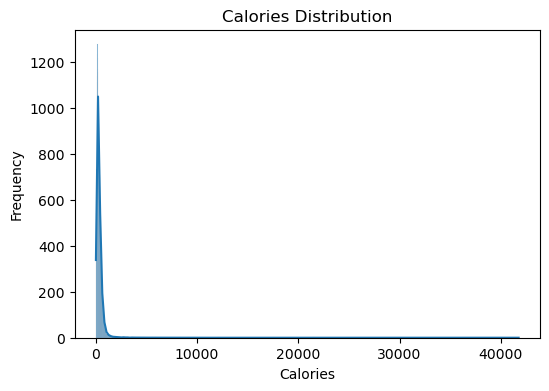

In [29]:
# plotting the distribution of calories values in the dataset  before normalization
plt.figure(figsize=(6, 4))
sns.histplot(recipe['Calories'], kde=True)
plt.title('Calories Distribution')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()


In [30]:
# applying min-max normalization to the recipes dataset  column (numeric values)
# Min-Max Normalization
# Min-Max normalization scales the data to a fixed range, usually [0, 1].
# This is done using the formula:
# X_normalized = (X - X_min) / (X_max - X_min)
# where X is the original value, X_min is the minimum value in the dataset, and X_max is the maximum value in the dataset.
# The MinMaxScaler from sklearn performs this operation.
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# recipe[['Calories', 'FatContent', 'CarbohydrateContent', 'ProteinContent', 'FiberContent', 'SodiumContent', 'SugarContent', 'CholesterolContent']] = scaler.fit_transform(recipe[['Calories', 'FatContent', 'CarbohydrateContent', 'ProteinContent', 'FiberContent', 'SodiumContent', 'SugarContent', 'CholesterolContent']])

# plotting the distribution of calories values in the dataset  after normalization
# plt.figure(figsize=(6, 4))
# sns.histplot(recipe['Calories'], kde=True)
# plt.title('Calories Distribution After Normalization')
# plt.xlabel('Calories')
# plt.ylabel('Frequency')
# plt.show()


In [31]:
recipe.describe()

,Calories,FatContent,CarbohydrateContent,ProteinContent,FiberContent,SodiumContent,SugarContent,CholesterolContent
count,28014.000000,28014.000000,28014.000000,28014.000000,28014.000000,28014.000000,28014.000000,28014.000000
mean,338.448058,16.691297,36.400596,11.681102,2.679110,512.897094,15.651192,61.485736
std,552.334886,41.033782,63.541202,21.364721,7.224639,4484.790165,42.376946,120.143094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,146.700000,4.800000,13.800000,2.800000,0.700000,112.725000,2.500000,5.900000
50%,250.250000,10.500000,27.100000,5.600000,1.600000,257.600000,7.200000,31.900000
75%,405.500000,20.100000,44.200000,14.700000,3.100000,550.700000,18.700000,80.600000
max,41770.200000,4701.100000,4320.900000,1802.900000,835.700000,704129.600000,3623.900000,9167.200000


In [32]:
# data encoding for categorical values 
# The LabelEncoder from sklearn performs this operation.
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
le = LabelEncoder()
# apply the encoder to the dataset 

health['gender'] = le.fit_transform(health['gender'])

health.info()






<class 'pandas.core.frame.DataFrame'>
Index: 197426 entries, 1164 to 687242
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   health_condition    197426 non-null  object 
 1   fitness_level       197426 non-null  float64
 2   activity_type       197426 non-null  object 
 3   age                 197426 non-null  int64  
 4   gender              197426 non-null  int64  
 5   height_cm           197426 non-null  float64
 6   weight_kg           197426 non-null  float64
 7   bmi                 197426 non-null  float64
 8   calories_burned     197426 non-null  float64
 9   duration_minutes    197426 non-null  float64
 10  resting_heart_rate  197426 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 18.1+ MB


In [33]:
health['health_condition'].value_counts()

health_condition
Hypertension    99437
Diabetes        64754
Asthma          33235
Name: count, dtype: int64

In [34]:
#get the name of diet first 10 
recipe['Name'].head(10)

3                   carina tofuvegetable kebab
5                         best blackbottom pie
16                                 carrot cake
26                           almond pound cake
54                       blueberry buttertarts
87                         buttermilkoat bread
121                              anzac biscuit
139    chickenfried steak cracked pepper gravy
170                   chocolate zucchini bread
171                      chocolate chip muffin
Name: Name, dtype: object

In [35]:
def infer_meal_type(row):
    for field in ['RecipeCategory', 'Keywords', 'Name']:
        text = str(row[field]).lower() if pd.notnull(row[field]) else ''
        if 'breakfast' in text or 'brunch' in text:
            return 'breakfast'
        elif 'lunch' in text:
            return 'lunch'
        elif 'dinner' in text or 'supper' in text:
            return 'dinner'
        elif 'snack' in text:
            return 'snack'
    return 'general'

recipe['MealType'] = recipe.apply(infer_meal_type, axis=1)


In [36]:
recipe['MealType'].value_counts()

MealType
general      20981
breakfast     4291
lunch         2659
dinner          64
snack           19
Name: count, dtype: int64

In [37]:
recipe.head(5)

,Name,Description,Images,RecipeInstructions,Keywords,RecipeCategory,Calories,FatContent,CarbohydrateContent,ProteinContent,FiberContent,SodiumContent,SugarContent,CholesterolContent,Type,MealType
3,carina tofuvegetable kebab,dish best prepared day advance allow ingredien...,"c(""https://img.sndimg.com/food/image/upload/w_...",drain tofu carefully squeezing excess water pa...,beans vegetable low cholesterol weeknight broi...,soytofu,536.1,24.0,64.2,29.3,17.3,1558.6,32.1,0.0,non-vegetarian,general
5,best blackbottom pie,make share best blackbottom pie recipe foodcom,character(0),graham cracker crust small bowl combine graham...,dessert weeknight stove top 4 hour,pie,437.9,19.3,58.0,7.0,1.8,267.6,42.5,94.3,non-vegetarian,general
16,carrot cake,one recipe husband every requested coworker br...,"c(""https://img.sndimg.com/food/image/upload/w_...",beat together egg oil white sugar blend mixtur...,vegetable weeknight oven 4 hour,dessert,522.6,27.1,67.0,5.0,1.6,534.8,47.9,69.8,non-vegetarian,general
26,almond pound cake,make share almond pound cake recipe foodcom,character(0),preheat oven 350 degree fahrenheit cream butte...,fruit nut weeknight oven 4 hour,dessert,408.5,17.9,56.0,6.9,1.3,159.4,29.0,118.9,non-vegetarian,general
54,blueberry buttertarts,make share blueberry buttertarts recipe foodcom,character(0),preheat oven 375f leave shell foil cup place b...,berries fruit 60 min oven,dessert,337.9,18.4,40.2,4.2,1.2,125.7,11.5,17.6,non-vegetarian,general


In [38]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import re

# Activity multipliers
activity_multipliers = {
    'walking': 1.2,
    'yoga': 1.3,
    'dancing': 1.45,
    'weight training': 1.55,
    'cycling': 1.6,
    'basketball': 1.7,
    'swimming': 1.75,
    'tennis': 1.75,
    'running': 1.8,
    'hiit': 1.9
}

def get_activity_multiplier(activity_type):
    return activity_multipliers.get(activity_type.lower(), 1.2)

def calculate_bmr(weight, height, age, gender):
    return 10 * weight + 6.25 * height - 5 * age + (5 if gender == 1 else -161)

def calorie_target(bmr, goal):
    if goal == 'weight_loss':
        return bmr - 500
    elif goal == 'weight_gain':
        return bmr + 500
    return bmr

def format_instructions(text):
    if not isinstance(text, str) or not text.strip():
        return "No instructions available."

    # Clean and split text into steps
    text = re.sub(r'\s+', ' ', text).strip()
    steps = re.split(r'(?<=[.!?])\s+|(?<=;)\s+', text)

    formatted = ""
    for i, step in enumerate(steps, 1):
        step = step.strip().capitalize()
        if len(step) > 3:
            formatted += f"{i}. {step}\n"
    return formatted.strip()

def suggest_diet(user_input, recipe):
    # 1. Filter by veg/non-veg
    diet_type = user_input['Type'].lower()
    filtered = recipe[recipe['Type'].str.lower() == diet_type]

    # 2. Filter by meal type
    filtered = filtered[filtered['MealType'].str.lower() == user_input['meal_type'].lower()]

    # 3. Filter based on health conditions
    for condition in user_input['health_conditions']:
        cond = condition.lower()
        if cond == 'diabetes':
            filtered = filtered[filtered['SugarContent'] <= 10]
        elif cond == 'hypertension':
            filtered = filtered[filtered['SodiumContent'] <= 400]
        elif cond == 'asthma':
            filtered = filtered[~filtered['RecipeInstructions'].str.contains('dairy', na=False, case=False)]

    if filtered.empty:
        print("❌ No recipes matched the filtering criteria.")
        return []

    # 4. BMR, TDEE, and target
    bmr = calculate_bmr(user_input['weight_kg'], user_input['height_cm'], user_input['age'], user_input['gender'])
    tdee = bmr * get_activity_multiplier(user_input['activity_type'])
    cal_target = calorie_target(tdee, user_input['goal'])

    print(f"\n🧮 BMR: {bmr:.2f} kcal")
    print(f"⚙️  TDEE (Activity Adjusted): {tdee:.2f} kcal")
    print(f"🎯 Final Calorie Target (goal: {user_input['goal']}): {cal_target:.2f} kcal\n")

    # 5. Nutrient columns
    nutrient_cols = ['Calories', 'FatContent', 'CarbohydrateContent', 'ProteinContent', 'FiberContent']
    filtered = filtered.dropna(subset=nutrient_cols)
    for col in nutrient_cols:
        filtered[col] = pd.to_numeric(filtered[col], errors='coerce')
    filtered = filtered.dropna(subset=nutrient_cols)

    if filtered.empty:
        print("❌ No valid nutrient data available.")
        return []

    # 6. Create target vector
    target_vector = [
        cal_target,
        cal_target * 0.25 / 9,
        cal_target * 0.50 / 4,
        cal_target * 0.25 / 4,
        10
    ]

    # 7. Normalize nutrients
    scaler = MinMaxScaler()
    scaled_nutrients = scaler.fit_transform(filtered[nutrient_cols])
    target_vector_scaled = scaler.transform([target_vector])[0]

    data_min = scaler.data_min_
    data_max = scaler.data_max_

    # 8. Similarity calculation
    similarity_scores = cosine_similarity([target_vector_scaled], scaled_nutrients).flatten()

    # 9. Top recipes
    top_n = min(user_input['meal_frequency'], len(filtered))
    top_indices = similarity_scores.argsort()[-top_n:][::-1]
    top_recipes = filtered.iloc[top_indices].copy()

    # Inverse transform to original scale
    top_recipes[nutrient_cols] = scaled_nutrients[top_indices] * (data_max - data_min) + data_min

    # 10. Output
    diet_plan = []
    for _, row in top_recipes.iterrows():
        diet_plan.append({
            'Name': row['Name'],
            'Calories (kcal)': round(row['Calories'], 2),
            'Fat (g)': round(row['FatContent'], 2),
            'Carbs (g)': round(row['CarbohydrateContent'], 2),
            'Protein (g)': round(row['ProteinContent'], 2),
            'Fiber (g)': round(row['FiberContent'], 2),
            'Sugar (g)': round(row.get('SugarContent', 0), 2),
            'Sodium (mg)': round(row.get('SodiumContent', 0), 2),
            'Instructions': format_instructions(row.get('RecipeInstructions', 'No instructions'))
        })

    return diet_plan
# Example user input
user_input = {
    'gender': 1,
    'age': 22,
    'height_cm': 170,
    'weight_kg': 65,
    'goal': 'weight_gain',
    'Type': 'vegetarian',
    'meal_type': 'lunch',
    'health_conditions': ['asthma'],
    'meal_frequency': 3,
    'activity_type': 'cycling'
}

diet_plan = suggest_diet(user_input, recipe)

if diet_plan:
    print("\n🍽️ Suggested Diet Plan:")
    for i, meal in enumerate(diet_plan, 1):
        print(f"\nMeal {i}:")
        for key, value in meal.items():
            print(f"{key}: {value}")

  



🧮 BMR: 1607.50 kcal
⚙️  TDEE (Activity Adjusted): 2572.00 kcal
🎯 Final Calorie Target (goal: weight_gain): 3072.00 kcal


🍽️ Suggested Diet Plan:

Meal 1:
Name: tortellini broth cheese crisp
Calories (kcal): 261.5
Fat (g): 7.8
Carbs (g): 33.2
Protein (g): 15.8
Fiber (g): 1.2
Sugar (g): 1.0
Sodium (mg): 387.5
Instructions: 1. Parmesan crispspreheat oven 400 degree f pour heaping tablespoon parmesan onto silicone parchment lined baking sheet lightly pat silicone baking sheet work better repeat remaining cheese spacing spoonful 12 inch apart make sure make least 810 heap least 8 crisp bake 3 5 minute golden crisp set aside cool soup crisp cooling pour broth heavy large saucepan cover bring boil high heat season broth pepper taste add tortellini simmer medium heat al dente 7 minute ladle broth tortellini soup bowl garnish parsley top parmesan crisp serving

Meal 2:
Name: mozzarella string cheese hobo bag
Calories (kcal): 61.9
Fat (g): 1.9
Carbs (g): 7.2
Protein (g): 3.8
Fiber (g): 0.2
Sug

/usr/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


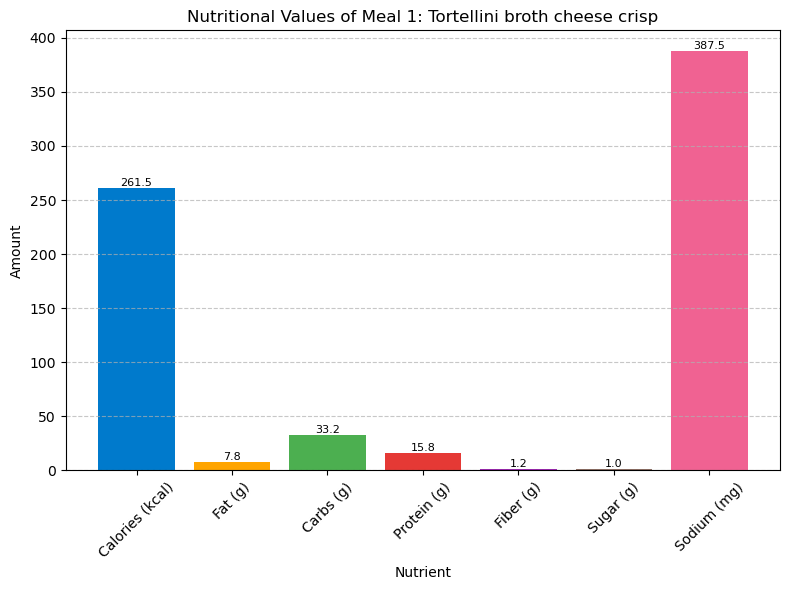

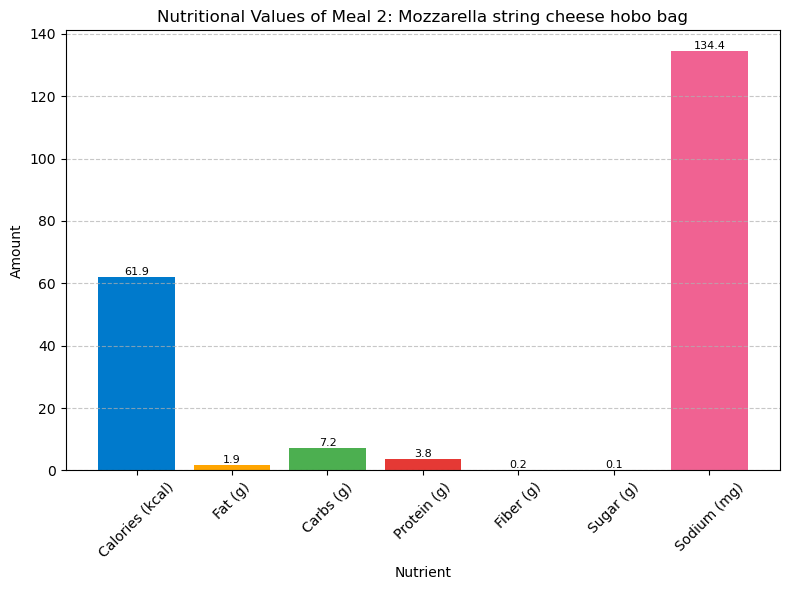

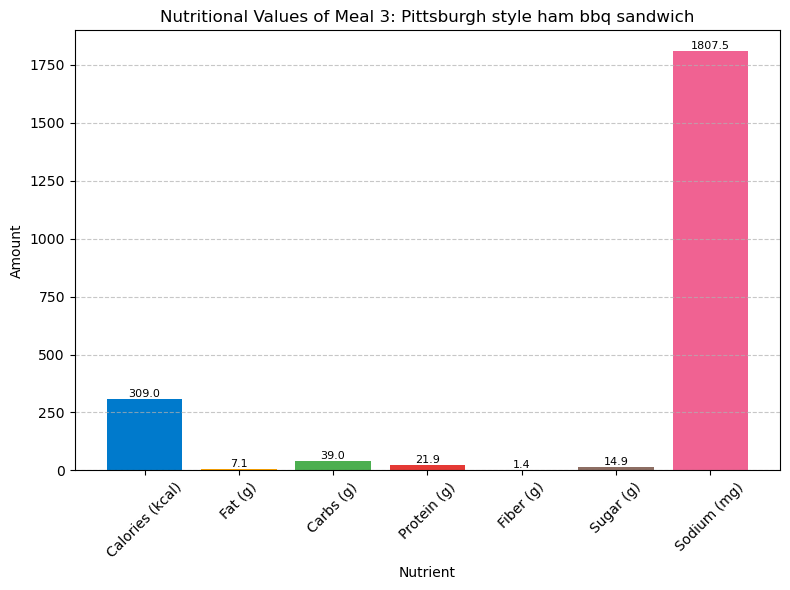

In [39]:
import matplotlib.pyplot as plt

# Define nutrients and their display units
nutrients = [
    ('Calories (kcal)', 'kcal'),
    ('Fat (g)', 'g'),
    ('Carbs (g)', 'g'),
    ('Protein (g)', 'g'),
    ('Fiber (g)', 'g'),
    ('Sugar (g)', 'g'),
    ('Sodium (mg)', 'mg')
]

# Plot each meal in the diet plan
for i, meal in enumerate(diet_plan):
    labels = [f"{n[0]}" for n in nutrients]
    values = [meal.get(n[0], 0) for n in nutrients]

    plt.figure(figsize=(8, 6))
    bars = plt.bar(labels, values, color=['#007acc', '#ffa500', '#4caf50', '#e53935', '#9c27b0', '#8d6e63', '#f06292'])

    # Annotate each bar with its value
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height(),
                 f'{value:.1f}', ha='center', va='bottom', fontsize=8)

    plt.title(f'Nutritional Values of Meal {i+1}: {meal["Name"].capitalize()}', fontsize=12)
    plt.xlabel('Nutrient')
    plt.ylabel('Amount')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
